KM_Curve_Practice

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
from string import ascii_lowercase
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark', context='talk')
# Kaplan-Meier curve
from lifelines import KaplanMeierFitter 
from sksurv.nonparametric import kaplan_meier_estimator
# Create a toy dataframe
df = pd.DataFrame(data={'duration': [3,9,5,8,7,2,1,3,4],
                        'event': [1,0,1,0,1,0,1,0,0]}, 
                  index=list(ascii_lowercase[:9]))
df

ModuleNotFoundError: No module named 'matplotlib'

: 

In [8]:
durations = df.sort_values('duration')['duration'].unique()
# Initialise the table
print(durations)
columns = ['duration', 'n_at_risk', 'n_events', 
           'survival_probability']
km = pd.DataFrame(columns=columns, dtype=np.number)
km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]], 
                            columns=columns))
# Calculate survival probability for each duration
for i, t in enumerate(durations):
    n = np.sum(df['duration']>=t)
    d = np.sum((df['duration']==t) & (df['event']==1))
    s = (1 - d / n) * km.loc[i, 'survival_probability']
    km = km.append(pd.DataFrame([[t, n, d, s]], 
                                index=[i+1],
                                columns=columns))
km

[1 2 3 4 5 7 8 9]


/tmp/ipykernel_4235/2283970506.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]],
/tmp/ipykernel_4235/2283970506.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
/tmp/ipykernel_4235/2283970506.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
/tmp/ipykernel_4235/2283970506.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
/tmp/ipykernel_4235/2283970506.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

,duration,n_at_risk,n_events,survival_probability
0,0.0,9.0,0.0,1.000000
1,1.0,9.0,1.0,0.888889
2,2.0,8.0,0.0,0.888889
3,3.0,7.0,1.0,0.761905
4,4.0,5.0,0.0,0.761905
5,5.0,4.0,1.0,0.571429
6,7.0,3.0,1.0,0.380952
7,8.0,2.0,0.0,0.380952
8,9.0,1.0,0.0,0.380952


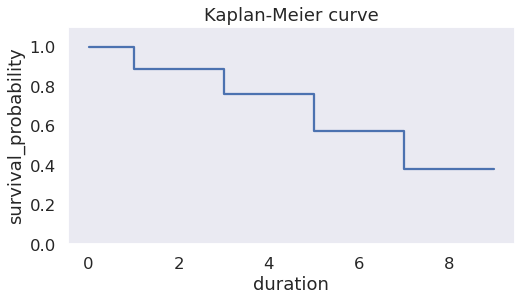

In [5]:
plt.figure(figsize=(8,4))
sns.lineplot(data=km, x='duration', y='survival_probability', 
             drawstyle='steps-negt')
plt.ylim(0,1.1) 
plt.title("Kaplan-Meier curve");

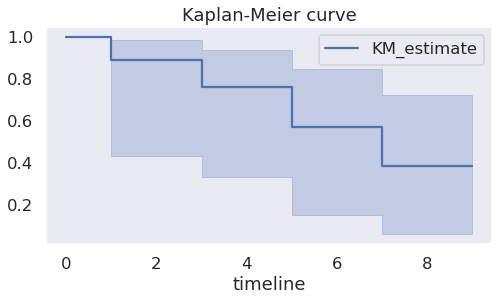

In [6]:
kmf = KaplanMeierFitter() 
kmf.fit(df['duration'], df['event'])
plt.figure(figsize=(8,4))
kmf.plot()
plt.title("Kaplan-Meier curve");

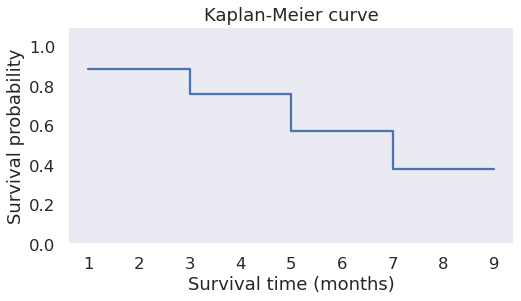

In [7]:
duration, survival_probability = kaplan_meier_estimator(df['event']==1, df['duration'])
plt.figure(figsize=(8,4))
plt.step(x=duration, y=survival_probability, where="negt")
plt.ylim(0,1.1)
plt.xlabel("Survival time (months)")
plt.ylabel("Survival probability")
plt.title("Kaplan-Meier curve")

In [9]:
survival_data = pd.read_csv("TCGA-BRCA_clinical.csv")
survival_data.set_index(survival_data['SAMPLE_ID'] , inplace = True)
survival_data.drop(columns = ["SAMPLE_ID"], inplace = True)

In [10]:
numDaysInMonth = 30.437
survival_data["OS_DAYS"] = survival_data["OS_MONTHS"] * 30.437
survival_data.sort_values(["OS_DAYS"], inplace = True)
test_df = survival_data[["OS_DAYS", "OS_STATUS"]]

In [110]:
survival_data

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,...,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,OS_DAYS,isMPS
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A8-A08H-01,TCGA-A8-A08H,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A094-01,TCGA-A8-A094,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A090-01,TCGA-A8-A090,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-C8-A12K-01,TCGA-C8-A12K,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,Yes,No,C8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A09Z-01,TCGA-A8-A09Z,ILC,Breast Cancer,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,NaN,NaN,0:CENSORED,0.000000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-B6-A0RE-01,TCGA-B6-A0RE,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,B6,Breast,...,0:LIVING,255.679390,0:ALIVE OR DEAD TUMOR FREE,255.679390,0:DiseaseFree,255.679390,0:CENSORED,255.679390,7782.113587,False
TCGA-B6-A0RN-01,TCGA-B6-A0RN,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,B6,Breast,...,0:LIVING,263.273827,0:ALIVE OR DEAD TUMOR FREE,263.273827,0:DiseaseFree,263.273827,0:CENSORED,263.273827,8013.265475,False
TCGA-B6-A0IA-01,TCGA-B6-A0IA,BRCNOS,Breast Cancer,Breast Invasive Carcinoma (NOS),Other,NaN,No,Yes,B6,Breast,...,0:LIVING,275.865470,0:ALIVE OR DEAD TUMOR FREE,275.865470,0:DiseaseFree,275.865470,0:CENSORED,275.865470,8396.517310,False


In [11]:
kmf = KaplanMeierFitter()


In [19]:
test_df['OS_STATUS'].replace("0:LIVING",0, inplace = True)
test_df['OS_STATUS'].replace("1:DECEASED", 1, inplace = True)

/tmp/ipykernel_4235/3270634811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['OS_STATUS'].replace("0:LIVING",0, inplace = True)
/tmp/ipykernel_4235/3270634811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['OS_STATUS'].replace("1:DECEASED", 1, inplace = True)


In [23]:
kmf.fit(durations = test_df['OS_DAYS'], event_observed = test_df['OS_STATUS'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1082 total observations, 931 right-censored observations>

<AxesSubplot:xlabel='timeline'>

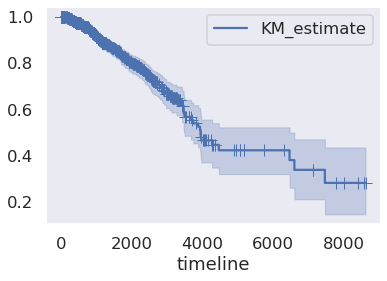

In [24]:
kmf.plot(show_censors = True)

In [121]:
# now need to compare survival curves of patients that are MPS+ and MPS-
MPS_Scores = pd.read_csv("MPSScores_7.csv")

In [30]:
survival_data['isMPS'] = False
# need to create a filter


In [123]:
MPS_Scores

,0,Patient_Names
0,-1.715959,TCGA-3C-AAAU-01
1,-0.000000,TCGA-3C-AALI-01
2,-0.000000,TCGA-3C-AALJ-01
3,0.070766,TCGA-3C-AALK-01
4,-0.307485,TCGA-4H-AAAK-01
...,...,...
1077,0.000000,TCGA-WT-AB44-01
1078,0.000000,TCGA-XX-A899-01
1079,0.608043,TCGA-XX-A89A-01
1080,2.744273,TCGA-Z7-A8R5-01


In [128]:
MPS_Scores = pd.DataFrame(MPS_Scores)
MPS_Scores_Positive = MPS_Scores[MPS_Scores['0'].apply(lambda x : x > 0)]
MPS_Scores_Negative = MPS_Scores[MPS_Scores['0'].apply(lambda x : x < 0)]
patient_IDs_positive = MPS_Scores_Positive['Patient_Names'].tolist()
patient_IDs_negative = MPS_Scores_Negative['Patient_Names'].tolist()

In [130]:
survival_data_2_pos = survival_data[survival_data.index.isin(patient_IDs_positive)]
survival_data_2_neg = survival_data[survival_data.index.isin(patient_IDs_negative)]

In [131]:
survival_data_2_pos['OS_STATUS'].replace("0:LIVING",0, inplace = True)
survival_data_2_pos['OS_STATUS'].replace("1:DECEASED", 1, inplace = True)

survival_data_2_neg['OS_STATUS'].replace("0:LIVING",0, inplace = True)
survival_data_2_neg['OS_STATUS'].replace("1:DECEASED", 1, inplace = True)

/tmp/ipykernel_4235/398321379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data_2_pos['OS_STATUS'].replace("0:LIVING",0, inplace = True)
/tmp/ipykernel_4235/398321379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data_2_pos['OS_STATUS'].replace("1:DECEASED", 1, inplace = True)
/tmp/ipykernel_4235/398321379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data_2_neg['OS_STATUS'].replace("0:LIVI

In [99]:
print(0 < -0)

False


In [113]:
survival_data_2_pos.sort_values('OS_STATUS')

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,...,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,OS_DAYS,isMPS
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A8-A08H-01,TCGA-A8-A08H,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A7-A0CD-01,TCGA-A7-A0CD,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,Yes,No,A7,Breast,...,0:LIVING,38.300950,0:ALIVE OR DEAD TUMOR FREE,38.300950,0:DiseaseFree,38.300950,0:CENSORED,38.300950,1165.766019,False
TCGA-E9-A22B-01,TCGA-E9-A22B,BRCNOS,Breast Cancer,Breast Invasive Carcinoma (NOS),Mixed Histology (NOS),NaN,Yes,No,E9,Breast,...,0:LIVING,38.366703,0:ALIVE OR DEAD TUMOR FREE,38.366703,0:DiseaseFree,38.366703,0:CENSORED,38.366703,1167.767334,False
TCGA-AR-A5QP-01,TCGA-AR-A5QP,ILC,Breast Cancer,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,No,Yes,AR,Breast,...,0:LIVING,38.958477,0:ALIVE OR DEAD TUMOR FREE,38.958477,NaN,NaN,0:CENSORED,38.958477,1185.779170,False
TCGA-A1-A0SN-01,TCGA-A1-A0SN,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A1,Breast,...,0:LIVING,39.320117,0:ALIVE OR DEAD TUMOR FREE,39.320117,0:DiseaseFree,39.320117,0:CENSORED,39.320117,1196.786402,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EW-A1P8-01,TCGA-EW-A1P8,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,EW,Breast,...,1:DECEASED,7.857448,1:DEAD WITH TUMOR,7.857448,1:Recurred/Progressed,6.805405,1:PROGRESSION,6.805405,239.157149,False
TCGA-BH-A1F5-01,TCGA-BH-A1F5,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,BH,Breast,...,1:DECEASED,89.160667,0:ALIVE OR DEAD TUMOR FREE,89.160667,NaN,NaN,0:CENSORED,89.160667,2713.783213,False
TCGA-LL-A73Z-01,TCGA-LL-A73Z,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,Yes,No,LL,Breast,...,1:DECEASED,7.462932,1:DEAD WITH TUMOR,7.462932,NaN,NaN,1:PROGRESSION,6.312260,227.149259,False


In [114]:
survival_data_2_pos

,PATIENT_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,...,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,OS_DAYS,isMPS
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A8-A08H-01,TCGA-A8-A08H,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A090-01,TCGA-A8-A090,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A09Z-01,TCGA-A8-A09Z,ILC,Breast Cancer,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,NaN,NaN,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A083-01,TCGA-A8-A083,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
TCGA-A8-A096-01,TCGA-A8-A096,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A8,Breast,...,0:LIVING,0.000000,0:ALIVE OR DEAD TUMOR FREE,0.000000,0:DiseaseFree,0.000000,0:CENSORED,0.000000,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-B6-A0X1-01,TCGA-B6-A0X1,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,B6,Breast,...,1:DECEASED,245.093205,0:ALIVE OR DEAD TUMOR FREE,245.093205,1:Recurred/Progressed,16.109413,1:PROGRESSION,16.109413,7459.901865,False
TCGA-B6-A0RN-01,TCGA-B6-A0RN,IDC,Breast Cancer,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,B6,Breast,...,0:LIVING,263.273827,0:ALIVE OR DEAD TUMOR FREE,263.273827,0:DiseaseFree,263.273827,0:CENSORED,263.273827,8013.265475,False
TCGA-B6-A0IA-01,TCGA-B6-A0IA,BRCNOS,Breast Cancer,Breast Invasive Carcinoma (NOS),Other,NaN,No,Yes,B6,Breast,...,0:LIVING,275.865470,0:ALIVE OR DEAD TUMOR FREE,275.865470,0:DiseaseFree,275.865470,0:CENSORED,275.865470,8396.517310,False


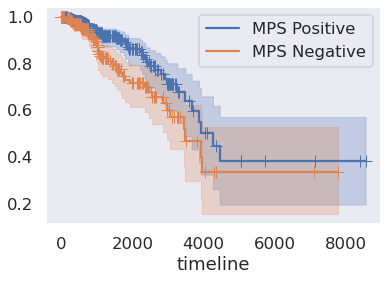

In [132]:

kmf_pos = KaplanMeierFitter()
kmf_neg = KaplanMeierFitter()
kmf_pos.fit(durations = survival_data_2_pos['OS_DAYS'], event_observed = survival_data_2_pos['OS_STATUS'], label = "MPS Positive")
kmf_neg.fit(durations = survival_data_2_neg['OS_DAYS'], event_observed = survival_data_2_neg['OS_STATUS'], label = 'MPS Negative')
ax = kmf_pos.plot(show_censors = True)
ax = kmf_neg.plot(ax = ax, show_censors = True)

In [93]:
ax = kmf_neg.plot(ax =ax)

In [95]:
ax.set_ylim([0.0,1.0])
ax

<AxesSubplot:xlabel='timeline'>

(0.0, 1.0)

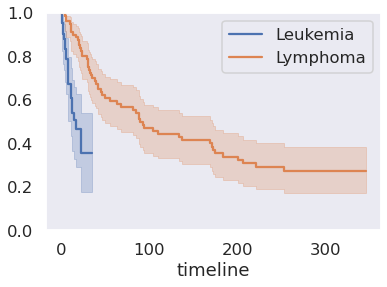

In [96]:
from lifelines.datasets import load_leukemia, load_lymphoma
from lifelines import KaplanMeierFitter
# Load datasets
df_leukemia = load_leukemia()
df_lymphoma = load_lymphoma()

# Fit & plot leukemia dataset
kmf_leukemia = KaplanMeierFitter()
kmf_leukemia.fit(df_leukemia['t'], df_leukemia['Rx'], label="Leukemia")
ax = kmf_leukemia.plot()

# Fit & plot lymphoma dataset
kmf_lymphoma = KaplanMeierFitter()
kmf_lymphoma.fit(df_lymphoma['Time'], df_lymphoma['Censor'], label="Lymphoma")
ax = kmf_lymphoma.plot(ax=ax)

# Set Y axis to fixed scale
ax.set_ylim([0.0, 1.0])